In [2]:
# Patrick Daly
# UMN Kaggle Group
# July 2, 2015
#
# Titanic Data Set
# - Machine Learning From Disaster
# 
# July 2, 2015 - Basic modeling, just getting up and running with python
# 

# Default BoilerPlate libs
import pandas as pd
from pandas import DataFrame, Series
import numpy as np

# Popular modeling libraries
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

# Plotting setttings
%matplotlib inline
import matplotlib.pyplot as plt

# Better looking plotting
import seaborn as sns
sns.set_palette("deep", desat = 0.6)
sns.set_context(rc={"figure.figsize": (8,4)})

# Suppress unnecessary errors
import warnings
warnings.filterwarnings('ignore')

In [14]:
train = pd.read_csv('train.csv', index_col='PassengerId')
test = pd.read_csv('test.csv', index_col='PassengerId')

In [15]:
train.shape

(891, 11)

In [75]:
train.head(20)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [74]:
train.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


In [77]:
# First pass - drop na's and 'Name', 'Cabin' and 'Ticket' columns.
train_clean = train.dropna(subset=['Age','Embarked'])
train_clean.drop(['Ticket', 'Name', 'Cabin'], axis=1, inplace=True)
train_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22,1,0,7.2500,S
2,1,1,female,38,1,0,71.2833,C
3,1,3,female,26,0,0,7.9250,S
4,1,1,female,35,1,0,53.1000,S
5,0,3,male,35,0,0,8.0500,S


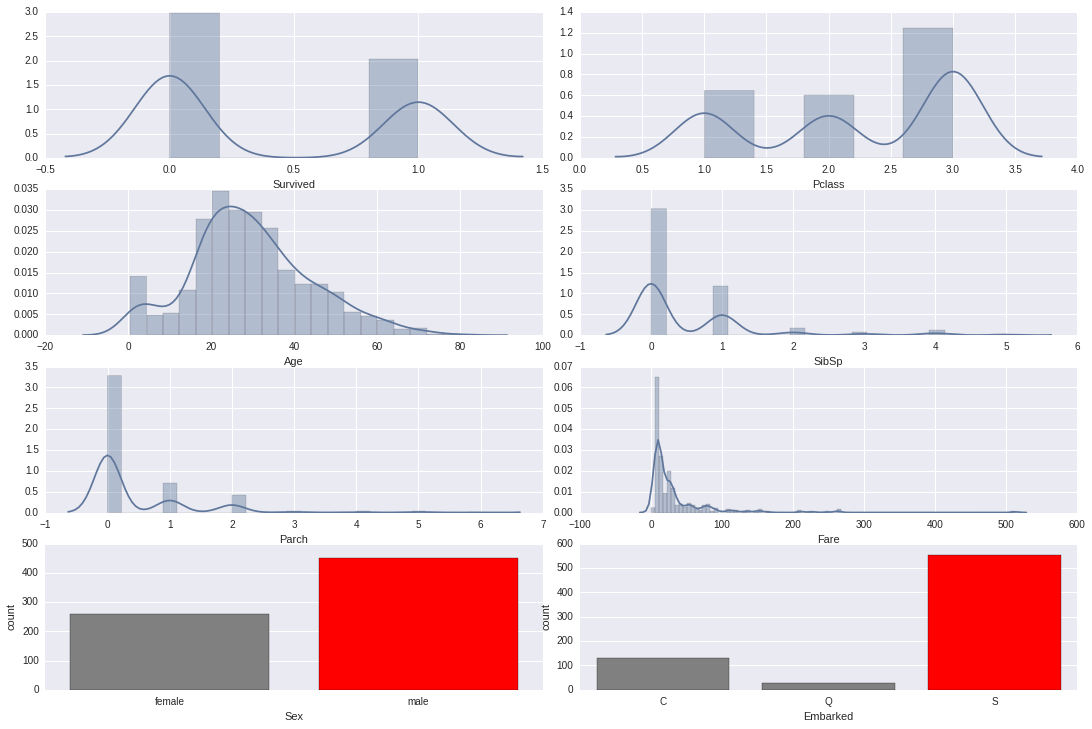

In [7]:
fig, axs = plt.subplots(4,2, figsize=(15,10))
fig.tight_layout()
sns.distplot(train_clean['Survived'], ax=axs[0][0]);
sns.distplot(train_clean['Pclass'], ax=axs[0][1]);
sns.distplot(train_clean['Age'], ax=axs[1][0]);
sns.distplot(train_clean['SibSp'], ax=axs[1][1]);
sns.distplot(train_clean['Parch'], ax=axs[2][0]);
sns.distplot(train_clean['Fare'], ax=axs[2][1]);
sns.barplot(train_clean['Sex'], ax=axs[3][0], color = ['grey', 'red']);
sns.barplot(train_clean['Embarked'], ax=axs[3][1], color = ['grey', 'grey', 'red']);

In [78]:
train_clean['Sex'] = train_clean['Sex'].map( {'male':1, 'female':0} ).astype(int)
train_clean['Embarked'] = train_clean['Embarked'].map( {'S':2, 'C':1, 'Q':0})

In [179]:
train_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22,1,0,7.2500,2
2,1,1,0,38,1,0,71.2833,1
3,1,3,0,26,0,0,7.9250,2
4,1,1,0,35,1,0,53.1000,2
5,0,3,1,35,0,0,8.0500,2


In [79]:
X = train_clean.drop('Survived', axis=1)
y = train_clean['Survived']
logit = sm.Logit(y,X)
fitter = logit.fit()

Optimization terminated successfully.
         Current function value: 0.496904
         Iterations 6


In [80]:
print fitter.summary()

                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      705
Method:                           MLE   Df Model:                            6
Date:                Tue, 30 Jun 2015   Pseudo R-squ.:                  0.2636
Time:                        20:57:13   Log-Likelihood:                -353.80
converged:                       True   LL-Null:                       -480.45
                                        LLR p-value:                 8.036e-52
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Pclass        -0.1998      0.107     -1.865      0.062        -0.410     0.010
Sex           -2.2922      0.204    -11.248      0.000        -2.692    -1.893
Age           -0.0075      0.006     -1.189      0.2

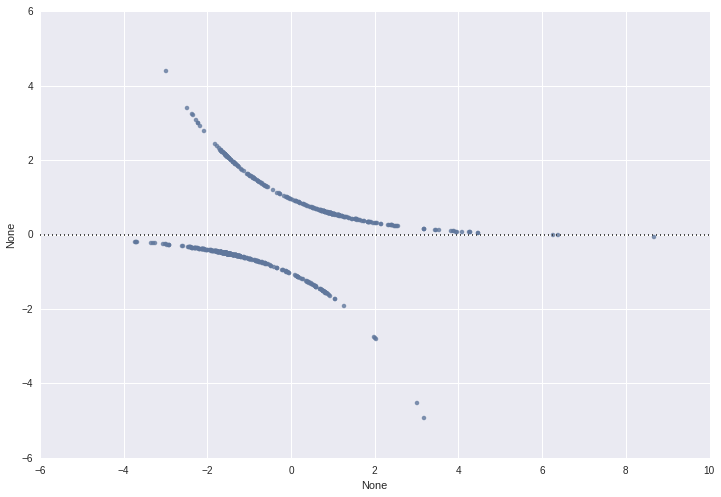

In [82]:
res = fitter.resid_pearson
dev = fitter.resid_dev
df = fitter.df_model
yhat = fitter.fittedvalues
fig, ax = plt.subplots( figsize = (12,8) );
sns.residplot(yhat,res);

In [86]:
fitter.llnull

-480.4518696278314

In [235]:
skmodel = LogisticRegression()
skmodel = skmodel.fit(X,y)
skmodel.score(X,y)

0.7921348314606742

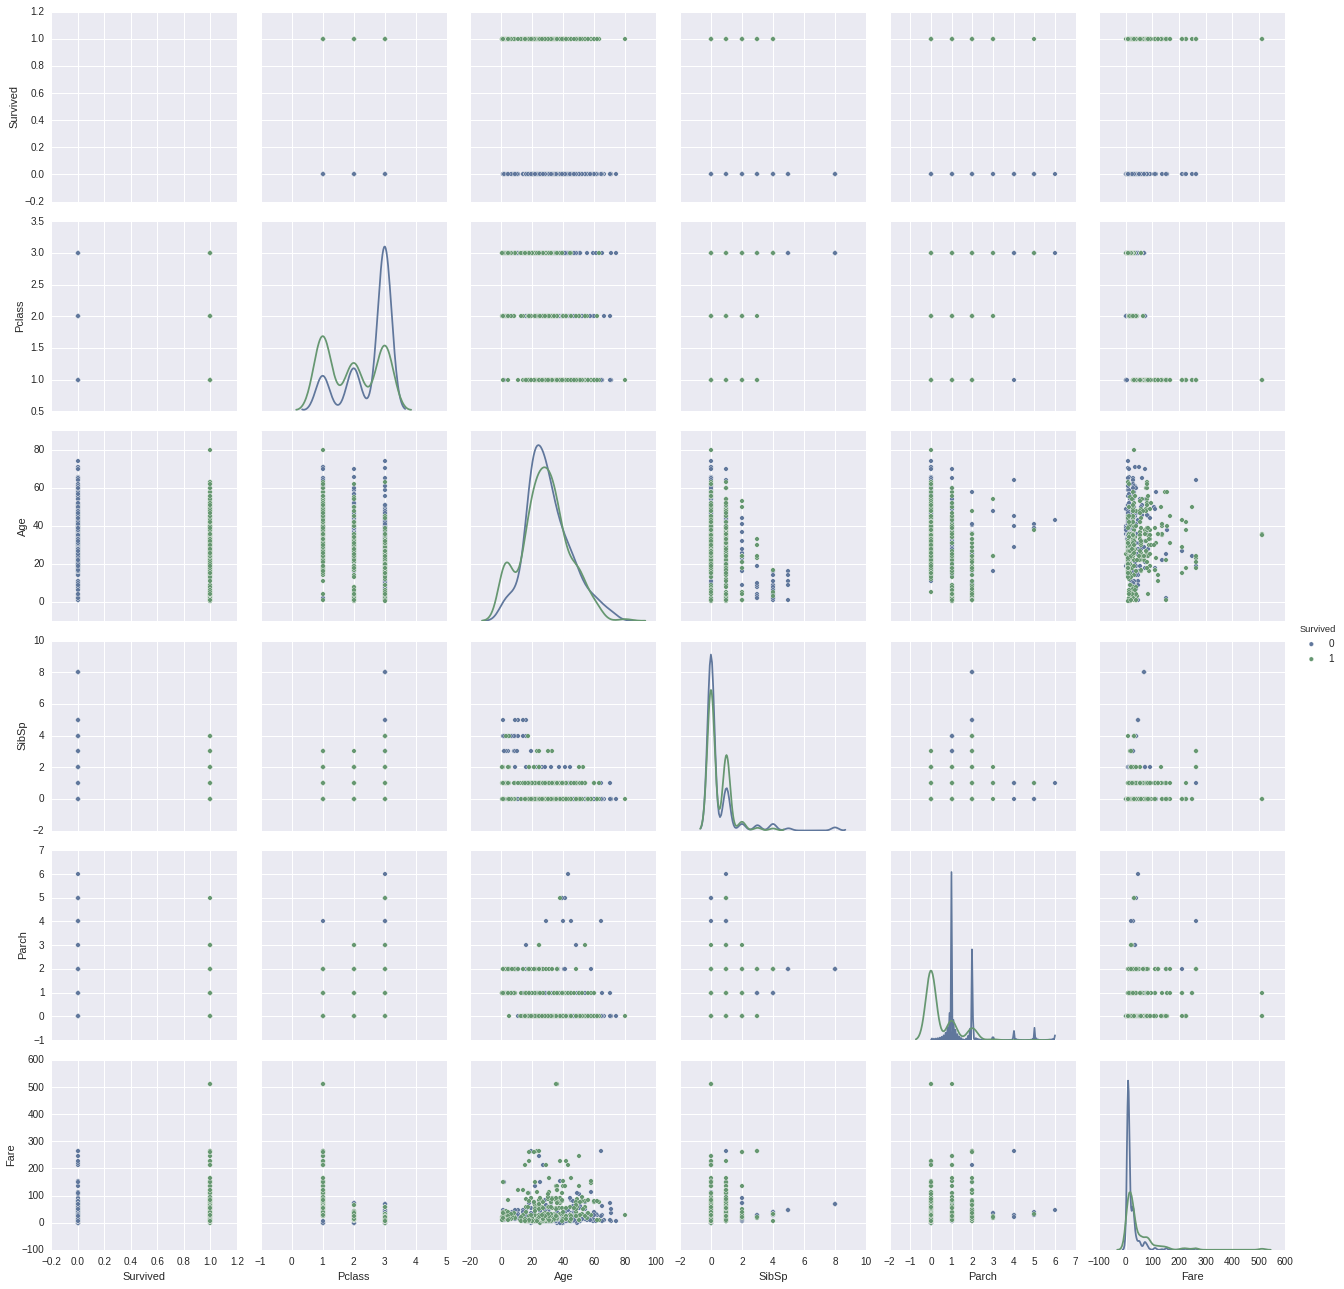

In [73]:
sns.pairplot( train, diag_kind = 'kde', hue='Survived');

In [42]:
trainValues = train.values

In [51]:
train['Survived'] = train['Survived'].astype('category')

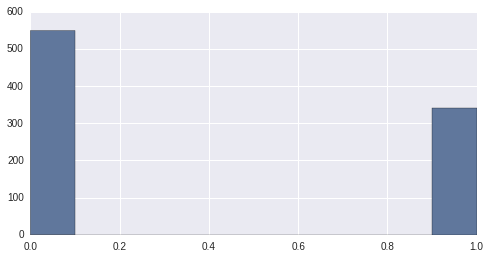

In [57]:
train['Survived'].hist();

In [66]:
train['Su()

array([0, 1])